# <center>Building testing suite for a project</center>

<img src="https://docs.pytest.org/en/stable/_static/pytest1.png" width=20% alt="pyTest logo">

One of the tools to make your software package bug-free, or at least robust as possible, is to add testing classes/methods to your code. These methods, in connection with module **pytest** enable you to test if your current version of the code still performs as intended. This is specially important as the code is evolving all the time and with new functionality, old functionality might fail.

The most common reasons for not using these tools is that people **a)** don't know they exist or **b)** the learning curve is too high for using them.

One of the major goals of this course is to give each of you an opportunity to learn the basics of these types of tools and try to lower the barriers for you to adopt and use them in your research. The commonly used testing environments in Python are:

 - [unittest](https://docs.python.org/3/library/unittest.html)
 - [nose](https://pypi.org/project/nose/)
 - [pytest](https://docs.pytest.org/)


For this assignment you could use any testing environment you like. The instructions below will be written for **pytest**. Your Anaconda installation should have ```pyTest``` module already installed, but check if this is the case:

 - **Linux/macOS/Unix**: in *terminal*, write the following: ```conda list | grep pytest```

 - **Windows**: in *Anaconda Prompt* or *PowerShell*, use the following command: ```conda list | findstr "pytest"```

If the command shows few line with **pytest** in them, you are good to go. If not, install pytest with: ```conda install pytest```. 

Before writing test scripts for pytest, first watch short video about usage of pytest.

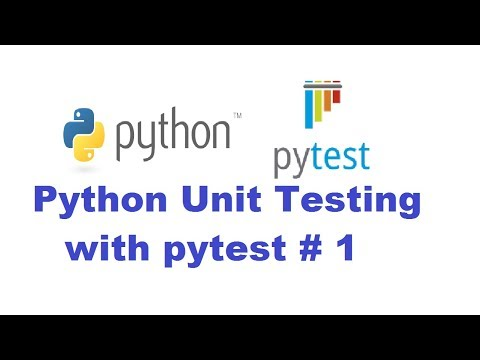

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("_QtM7QGuj1A",width=640,height=360,cc_load_policy=True)

---
# Instructions

The above video suggests to store testing script next to (in the same directory) as your Python scripts. However, another good thing to do is create a subdirectory named **_tests_** inside the ```ProjectName-->mysourcename``` directory.  Your folder structure should look something like this:


    ProjectName/
        .gitignore
        docs/
             package_name/
                  module1.html
                  module2.html
             images/
                  image1.jpg
        environments.yml
        Examples/
              datafile1.csv
              datafile2.tiff
              datafile3.xls
        LICENSE.txt
        makefile
        Models/
             Otimization_Report.ipynb
             Statistical_Methods_Report.ipynb
             Graph_Theory_Report.ipynb
             ABM_Report.ipynb
             ML_Report.ipynb
             ODE_Report.ipynb
        package_name/
              __init__.py
              module1.py
              module2.py
              test/
                  __init__.py
                  test_module1.py
                  test_module2.py
        README.md
        setup.py
        Tutorial.ipynb

       

## Short hands-on practice of writing test scripts

The easiest way to learn programming is to learn it firsthand, so lets create simple script for loading "input" file to your code and testing script to test if the function performs as intended. 

Testing can be done for individual objects/classes/methods/functions or of the program as a whole. The best is to test small pieces of codes (classes or functions) first and then later the whole code as the code grows.

For this practice lets create a folder called ```unitpractice``` with the following structure:


    unitpractice/
        input_good.inp
        input_bad.inp
        code/
              __init__.py
              read_file.py
              test/
                  __init__.py
                  test_module1.py
                  test_module2.py

        
       

&#9989; **<font color=red>Step 1:</font>** For the purpose of the test, create a short Python file named ```read_file.py``` in your code directory. The purpose of the function is to read input for for your "simulation". The content of the file is as follows:
```python
import numpy as np 
import os

def read_file(filename):
    '''
        Read input file with given name.
        
        Args:
            filename (string): full path for input file
        Returns:
            (numpy array): the content of the file
    '''
    if not os.path.isfile(filename):
        raise ValueError("Input file does not exist: {0}. I'll quit now.".format(filename))

    # code to load and parse the data from input file
    data = np.loadtxt(filename, delimiter=',')

    if len(data) < 5:
        # there should be 5 rows
        raise ValueError("Not enough rows in input file.")

    return data
```

In [18]:
import pandas as pd
exampledata = pd.read_csv('test.csv')
del exampledata['Unnamed: 0']
exampledata

,student_id_fk,is_transfer_credit,first_course_datetime,gender,ethnicity,sem_index,dept_name,math_placement_score,hsgpa,year_started
0,"b"" 'l\xe4\x1c\x8a\x8d]\xcf\x8fs\xf9_D\xb4\xc5\...",0,2007-08-27,F,Black (non Hispanic),14,Natural Science Dean,0.357143,3.810,2007
1,"b"" )%\xf7~\x15a\rx'\x90\xbe \x0c\x1a\x85\x1e\x...",0,1999-08-30,F,Caucasian (non Hispanic),9,Teacher Education,0.464286,3.922,1999
2,"b"" Cj\xd2E\x88\x8e\x9a\xccw\x85\xcd\xc6l\x049\...",0,1996-08-26,F,Caucasian (non Hispanic),10,Department of Supply Chain Mgt,0.428571,3.164,1996
3,"b"" M\xa9x\xe3\x9b\xe4x\x05\xb5\xbf%yiOB\x17]\x...",0,1992-09-02,M,Black (non Hispanic),16,Department of Supply Chain Mgt,0.178571,3.180,1992
4,"b"" Y55w(\xf1 @\x84\xdb\xb1\xe5\xc7.\x07^S\xc8\...",0,2009-09-02,M,Not Requested,11,Communication,0.678571,NaN,2009
5,"b"" [/\xe5>\xbfZ\xbb\xfbY\xf4\x15\x01O\xe1\x9c\...",0,1993-08-30,M,Caucasian (non Hispanic),14,"Agricultural, Food, & Resource Econ",0.250000,3.241,1993
6,"b"" \x15c \x93\x04m\x94UB\xf6\x98\xb2\xe69\x15n...",0,2008-08-25,M,Not Requested,14,Economics,0.571429,NaN,2008
7,"b"" \x15u\xdaJ\x07H\xdc\xe9\xcb\xdf\x93'\xfegy\...",0,1992-09-02,M,Caucasian (non Hispanic),11,Advertising and Public Relations,0.392857,2.680,1992
8,"b"" \x17\xd2\x17\xc0\xea\x13\xf2\xf3~'\x98\xfa!...",0,2004-08-30,F,Caucasian (non Hispanic),12,Natural Science Dean,0.642857,3.750,2004
9,"b"" \x8a\x037YDv\xa9\xf7'*\xf5m03\xfa\tY\xf1\x0...",0,1997-08-25,M,Caucasian (non Hispanic),9,Finance,0.500000,3.509,1997


In [80]:
columns = exampledata.columns
def dftest(data):
    columnnames = []
    for column in data:
        print(type(data[column][0]))
        if type(data[column][0]) == str:
            raise TypeError("This dataframe contains columns that are not of type 'int64'.")
        columnnames.append(column)
    return columnnames

In [81]:
dftest(exampledata)

<class 'str'>


TypeError: This dataframe contains columns that are not of type 'int64'.

In [82]:
import unittest
import pandas as pd

class TestStringInt(unittest.TestCase):
    def test_types(self):
        self.assertRaises(TypeError, dftest, str)


In [85]:
!python -m unittest string_test.py

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


&#9989; **<font color=red>Step 2:</font>** Following the naming convention for test scripts, create a Python script named ```test_read_file.py``` in directory ```tests```. The test will check if function for loading an input file can handle different input parameters: if the file exists, if the content of the file is not complete, etc. 

The test script will have 3 functions, each testing different functionality of the ```read_file``` function. When testing, 3 tests will be performed and if all goes according to plan, testing should result in **3 tests passed**.

The content of the file is following:

```python 
import read_file
import pytest
import numpy as np 

def test_file_load_good():
    # test if function returns numpy array for good input file.
    data = read_file.read_file("input_good.inp")
    assert type(data) == np.ndarray

def test_file_load_bad():
    # Test if the function raises the exception if nonexisting file name is passed as parameter.
    with pytest.raises(ValueError) as excinfo:
        read_file.read_file("input_bad.inp")

    assert "enough rows in input file" in str(excinfo.value)

def test_file_load_missing_file():
    # Test if the function raises the exception if nonexisting file name is passed as parameter.
    with pytest.raises(ValueError) as excinfo:
        read_file.read_file("non-existing_file.txt")

    assert "file does not exist" in str(excinfo.value)
    
 
```


&#9989; **<font color=red>Step 3:</font>** Create following two input files we will use for testing. They should be in the same directory as testing script:

 - file ```input_good.inp```:
```
# header line
1
2
3
4
5
```


 - file ```input_bad.inp```:
```
# header line
1
2
3
4
```


&#9989; **<font color=red>Step 4:</font>** Let's test our code with a test file. Open a terminal, if you haven't it already, and go to testing directory (directory ```tests``` in your project). 

Setup ```PYTHONPATH``` to include directory where your source files are locate, and also newly created ```read_file.py``` - similar as you did when creating documentastion for your project. The command is: 

 - **Linux/Unix/macOS**: ```export PYTHOPATH=<path-to-your-unitpractice-directory>:$PYTHONPATH```
 
 - **Windows** (in Anaconda Shell or Power Shell): ```set PYTHONPATH=<path-to-your-unitpractice-directory>;%PYTHONPATH%```
 

> _**NOTE**_:  Turns out getting pytest to work on windows may be a bit tricky.  Different windows setups are acting differently and the instructor has not found a solution that works on all systems.  If you are using Powershell you may need to use the following syntax to set your PYTHONPATH
>
> ```$env:PYTHONPATH = “path-to-your-unitpractice-directory”```

 

When path is set, run pytest from inside your unitpractice directory with:

```pytest code```

and the test should output the results of testing in the last line of the input. The line include number of passed and failed tests. In the example above, it should say that 3 tests passed (we had three functions in our test script) - the function ```read_file``` performs as intended.

Two different ways to run the tests:

 - to get more verbose output of test performed, add ```-v``` argument to the **pytest**: ```pytest -v test_read_file.py```
 


&#9989; **<font color=red>Step 5:</font>** Now change the Python script in a way, that the test will fail! Run testing with more verbose output (```-v```) to see what is tested and which test failed.

There are many ways to do that, few of them are:

 - try testing input file **input_good.inp** in test function ```test_file_load_bad```. Test now fails. Why?
 - try returning **list** in ```read_file``` instead of **numpy array**. That test now fails.
 
 

## Write a testing script for your project

&#9989; **<font color=red>Step 1:</font>** First **idetify the class/method you wish to test**: that is the core computational method or your code or simple reading in input parameters. For chosen method, define **input parameters** and **expected results** for those parameters. With testing you will ensure the methods will return expected results for certain input parameters.


&#9989; **<font color=red>Step 2:</font>** Write a testing script in directory ```tests``` and confirm that test script can catch errors in the selected function - the same was as in **Step 4** on previous section.


&#9989; **<font color=red>Step 3:</font>** Now you are ready to use pytest to harden your code and reduce the number of bugs!

## Advanced users

In your projects we had you include a makefile.  If you are running on a system with the "Make" program installed you should be able to run using the following command:

    make test
    
Note this is likely how your professor will get things working. 

## Cleaning you project directory

If testing in **steps 1-4** was successful, you can delete files we used in this test: 
 - three files in directory ```tests```: test_read_file.py, input_good.inp, input_bad.inp
 - Python script in your project directory: read_file.py
 
These files were there only for practicing testing. But you can keep them and use them as a basis for your scripts.

## Additional reading - not mandatory!

If you want to learn more about testing, adding options, parameters or pytest fixes, following videos would a good start. They are continuation of video from the beginning of this document:

- Python Unit Testing With Pytest, video 2, 3, and 4


In [ ]:
YouTubeVideo("VKY-0LEmrwk",width=640,height=360,cc_load_policy=1)

In [ ]:
YouTubeVideo("7qMhuVGqGY4",width=640,height=360,cc_load_policy=1)

In [ ]:
YouTubeVideo("JJmTO95AoqE",width=640,height=360,cc_load_policy=1)

---
### Getting credit for your assignment

Now, you just need to commit and push this report to your project git repository. Your instructor will download your repository and check your lint using the ```make test``` command so make sure that is working. 

-----
### Congratulations, you are done!